Importing Required Libraries  


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import joblib
import numpy as np
import nltk
import pandas as pd
import warnings
warnings.filterwarnings('default')

Importing a CSV file to DataFrame format.


In [4]:
data = pd.read_csv('Training.csv')

In [5]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


Fetching Entire Columns


In [8]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

Droping Columns that are not recquired

In [9]:
data=data.drop(['Unnamed: 133'], axis=1)

Checking number of NaN or Blank cell present in Dataset


In [10]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Checking number of each rows by Disease Names 


In [11]:
data['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Cleaned Data Saved 


In [12]:
data.to_csv('cleaned_disease.csv')

Encoding Column "prognosis" and saved in variable 'y' (to predict)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y= encoder.fit_transform(data["prognosis"])

In [14]:
x=data.drop(["prognosis"],axis=1)

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state =0)

In [16]:
x_train.shape

(3936, 132)

In [17]:
x_test.shape

(984, 132)

Gaussian Naive Bayes

In [18]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
scores = cross_val_score(nb, x, y, cv = 10,
                            n_jobs = -1)

print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [19]:
y_test_pred=nb.predict(x_test)

In [20]:
y_train_pred = nb.predict(x_train)

In [21]:
accuracy_score(y_train, nb.predict(x_train))*100


100.0

In [22]:
accuracy_score(y_test, y_test_pred)*100

100.0

In [23]:
confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 24]], dtype=int64)

Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
scores = cross_val_score(rfc, x, y, cv = 10,
                            n_jobs = -1)

print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [25]:
y_test_pred_rfc = rfc.predict(x_test)

In [26]:
y_train_pred_rfc = rfc.predict(x_train)

In [27]:
accuracy_score(y_train, rfc.predict(x_train))*100

100.0

In [28]:
accuracy_score(y_test, y_test_pred_rfc)*100

100.0

In [29]:
confusion_matrix(y_test, y_test_pred_rfc)

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 24]], dtype=int64)

Decision Tree Classifier


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
scores = cross_val_score(dtc, x, y, cv = 10,
                            n_jobs = -1)

print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [31]:
y_test_pred_dtc = dtc.predict(x_test)

In [32]:
y_train_pred_dtc = dtc.predict(x_train)

In [33]:
accuracy_score(y_train, dtc.predict(x_train))*100

100.0

In [34]:
accuracy_score(y_test, y_test_pred_dtc)*100

100.0

In [35]:
confusion_matrix(y_test, y_test_pred_dtc)

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 24]], dtype=int64)

Functions for Disease Prediction 


In [36]:
data_columns = []
for i in data.columns:
    if i not in data_columns:
        symptom = " ".join([j.capitalize() for j in i.split("_")])
        data_columns.append(symptom)
symptoms = x.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}
def symptoms_predection(symptoms):
    space_removed = symptoms.replace("and",",")
    filtered_sent = ''
    for i in data_columns:
        if i in space_removed:
            filtered_sent += f'{i},'
   
    symptoms = filtered_sent.split(",")
    
    filter_symptoms = symptoms.pop(len(symptoms)-1) 
    
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    input_data = np.array(input_data).reshape(1,-1)
    rf_prediction = data_dict["predictions_classes"][rfc.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][nb.predict(input_data)[0]]
    rfc_prediction = data_dict["predictions_classes"][rfc.predict(input_data)[0]]
    global final_prediction
    final_prediction = mode([rf_prediction, nb_prediction,rfc_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction" :nb_prediction,
        "Decision_Tree_prediction" : rfc_prediction,
        "final_prediction":final_prediction
    }
    
    return predictions
 


I'm adding symptoms of jaundice to the function to test if it displays the correct disease name. 


In [38]:
import warnings
warnings.filterwarnings('ignore')
symptoms_predection("Yellowish Skin,Abdominal Pain,Nausea,Dark Urine,High Fever")

{'rf_model_prediction': 'Jaundice',
 'naive_bayes_prediction': 'Jaundice',
 'Decision_Tree_prediction': 'Jaundice',
 'final_prediction': 'Jaundice'}

Here,
Random Forest  Predicted Jaundice
Naive Bayes Predicted Jaundice
Decision Tree predicted jaundice
Final Prediction = Jaundice 

Testing in Joblib 


In [39]:
from joblib import dump
dump(symptoms_predection,'func_file_disease_prec.joblib')

['func_file_disease_prec.joblib']

In [40]:
from joblib import load
loaded_function = load('func_file_disease_prec.joblib')

In [41]:
import warnings
warnings.filterwarnings('ignore')
text = input("Write your Symptoms..... ")
loaded_function(text)
f"It seems that you have {final_prediction}"

Write your Symptoms..... Yellowish Skin,Abdominal Pain,Nausea,Dark Urine,High Fever


'It seems that you have Jaundice'

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

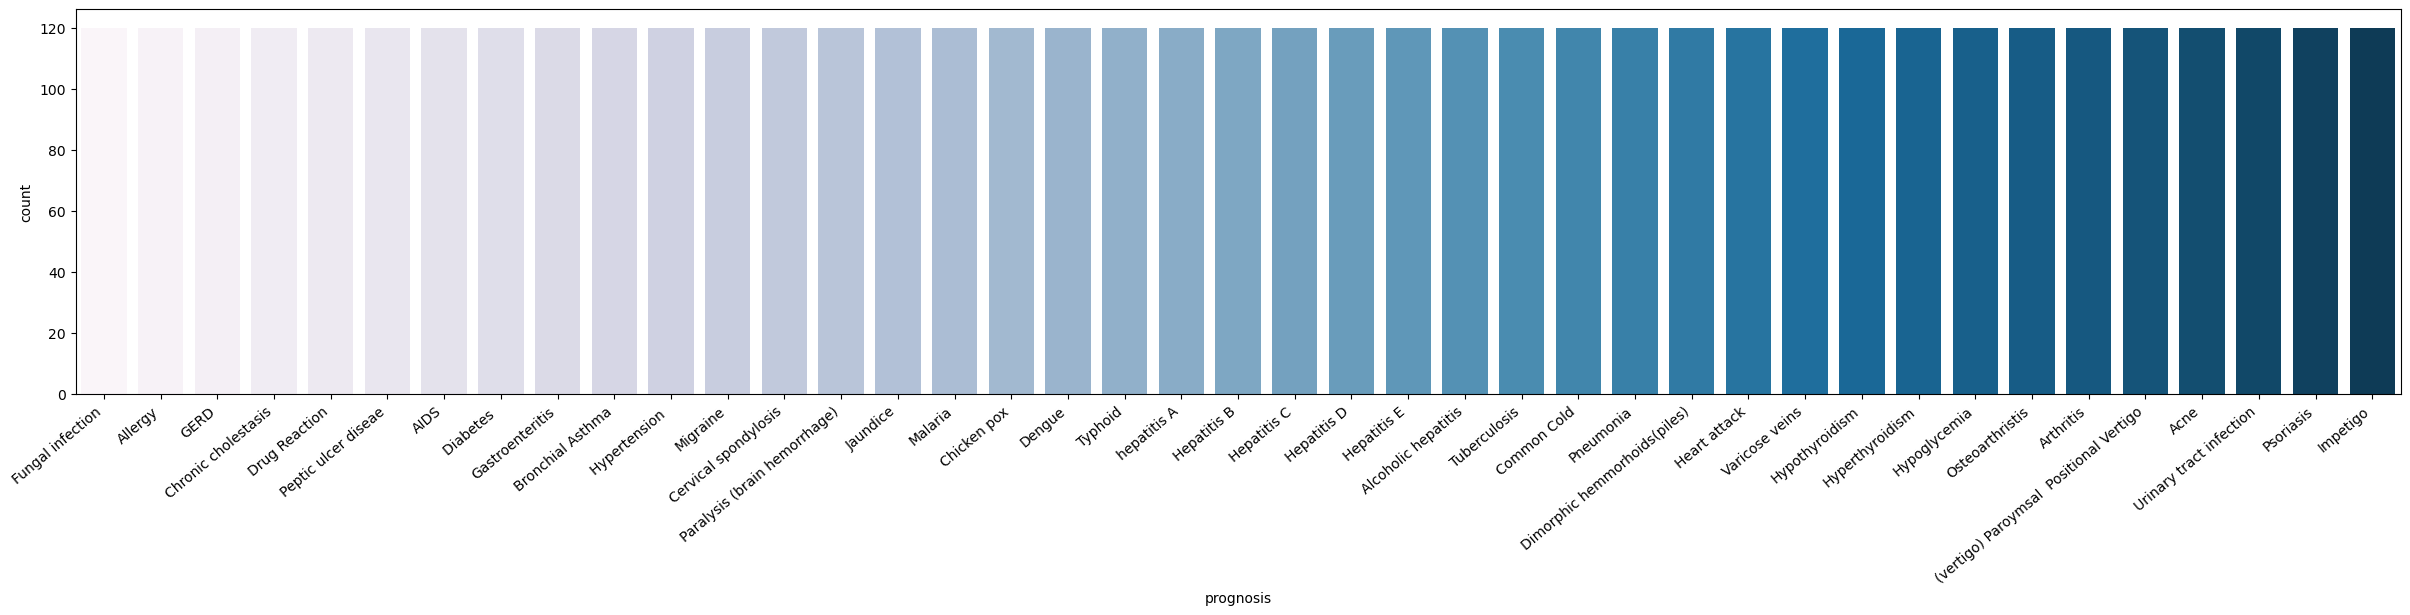

In [44]:
plt.figure(figsize = (30, 5))
ax = sns.countplot(data['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()